In [27]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [28]:
# Set seed for reproducibility
np.random.seed(42)

In [29]:
# 1. Load and Preprocess the Wine Dataset
# Fetch Wine dataset (ID = 186)
wine = fetch_ucirepo(id=186)

# Extract features and target
X = wine.data.features  # Pandas DataFrame
y = wine.data.targets  # Pandas DataFrame

In [30]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [31]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [32]:
# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)

In [33]:
# Filter for red wine only (based on metadata, red wine is first 1599 rows)
df_red = df.iloc[:1599]  # Red wine has 1599 samples

In [34]:
# 2. Explore the dataset
print("=== Wine Quality Dataset (Red Wine) ===")
print("\nFirst 5 Rows:")
print(df_red.head())
print("\nShape:", df_red.shape)
print("\nMissing Values:")
print(df_red.isnull().sum())
print("\nQuality Distribution:")
print(df_red['quality'].value_counts().sort_index())

=== Wine Quality Dataset (Red Wine) ===

First 5 Rows:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.

In [35]:
# 3. Binarize the target for classification
# Quality >= 6 is "good" (1), < 6 is "bad" (0)
df_red['quality_binary'] = (df_red['quality'] >= 6).astype(int)
print("\nBinary Target Distribution:")
print(df_red['quality_binary'].value_counts())


Binary Target Distribution:
quality_binary
1    855
0    744
Name: count, dtype: int64


C:\Users\Samar\AppData\Local\Temp\ipykernel_32660\2755514637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['quality_binary'] = (df_red['quality'] >= 6).astype(int)


In [36]:
# 4. Separate features and target
X = df_red.drop(['quality', 'quality_binary'], axis=1)  # Features
y = df_red['quality_binary']  # Binary target

In [37]:

# 5. Optional: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [38]:
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
# 7. Train Decision Tree Classifier
clf = DecisionTreeClassifier(
    max_depth=3,          # Limit depth
    min_samples_split=10, # Minimum samples to split
    random_state=42
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)

In [40]:
# 8. Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nTest Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad', 'Good']))


Test Accuracy: 0.7156

Classification Report:
              precision    recall  f1-score   support

         Bad       0.72      0.58      0.64       141
        Good       0.71      0.82      0.76       179

    accuracy                           0.72       320
   macro avg       0.72      0.70      0.70       320
weighted avg       0.72      0.72      0.71       320



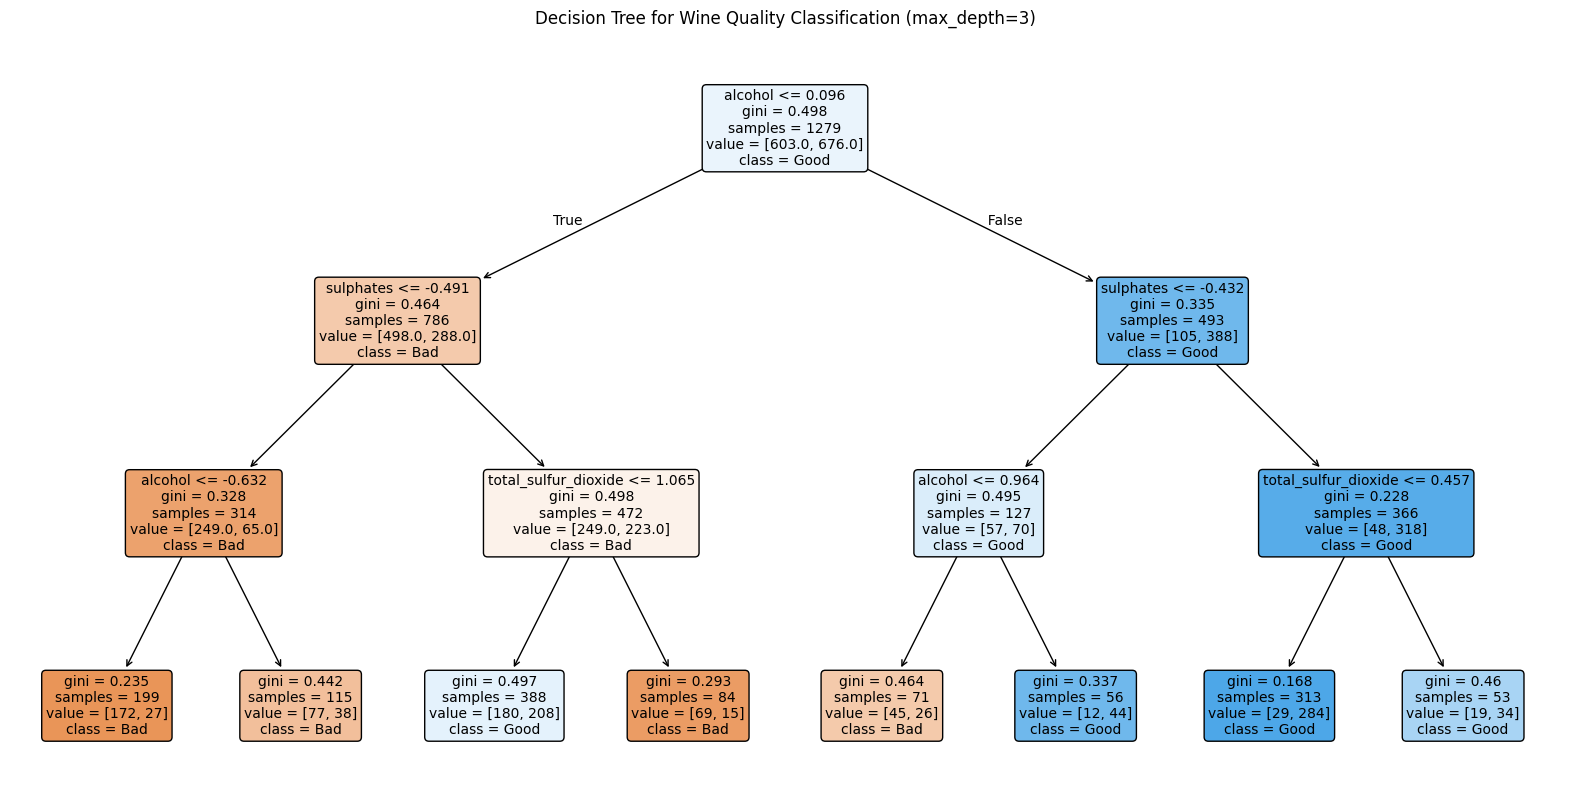

In [41]:
# 9. Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Bad', 'Good'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Wine Quality Classification (max_depth=3)")
plt.show()

In [42]:
# 10. Feature importance
feature_importance = pd.DataFrame(
    {'Feature': X.columns, 'Importance': clf.feature_importances_}
)
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))


Feature Importance:
                 Feature  Importance
10               alcohol    0.639821
9              sulphates    0.235789
6   total_sulfur_dioxide    0.124390
2            citric_acid    0.000000
1       volatile_acidity    0.000000
0          fixed_acidity    0.000000
3         residual_sugar    0.000000
5    free_sulfur_dioxide    0.000000
4              chlorides    0.000000
8                     pH    0.000000
7                density    0.000000


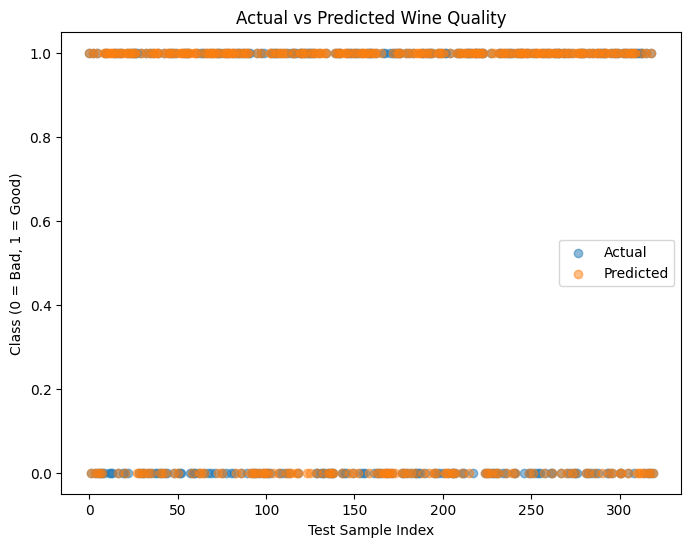

In [43]:
# 11. Optional: Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label='Predicted', alpha=0.5)
plt.xlabel('Test Sample Index')
plt.ylabel('Class (0 = Bad, 1 = Good)')
plt.title('Actual vs Predicted Wine Quality')
plt.legend()
plt.show()